<br>
<div align="right">Enseignant : Aric Wizenberg</div>
<div align="right">E-mail : icarwiz@yahoo.fr</div>
<div align="right">Année : 2018/2019</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 MASERATI - Cours de Python</span></div><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:24px;color:#e60000">Bases de Pandas</span></div><br><br>
<hr>

# Introduction

Lorsque l'on veut travailler avec des données en Python, il y a deux modules incontournables : **pandas** et **numpy**.

**Pandas** définit 3 types essentiels au traitement de données :
- Les **pandas.DataFrame** :
    - sont utilisés pour représenter des **tables de données**.
- Les **pandas.Series** : 
    - (Series est toujours écrit avec "s" à la fin) 
    - sont utilisés pour représenter des **séries de données**. 
    - les **pandas.DataFrame** contiennent des **pandas.Series**.
- Les **pandas.Index** :
    - (et toutes ses déclinaisons), 
    - sont utilisés pour représenter des **séries d'identifiants uniques**. 
    - les **pandas.Series** et **pandas.DataFrame** contiennent des **pandas.Index**. 

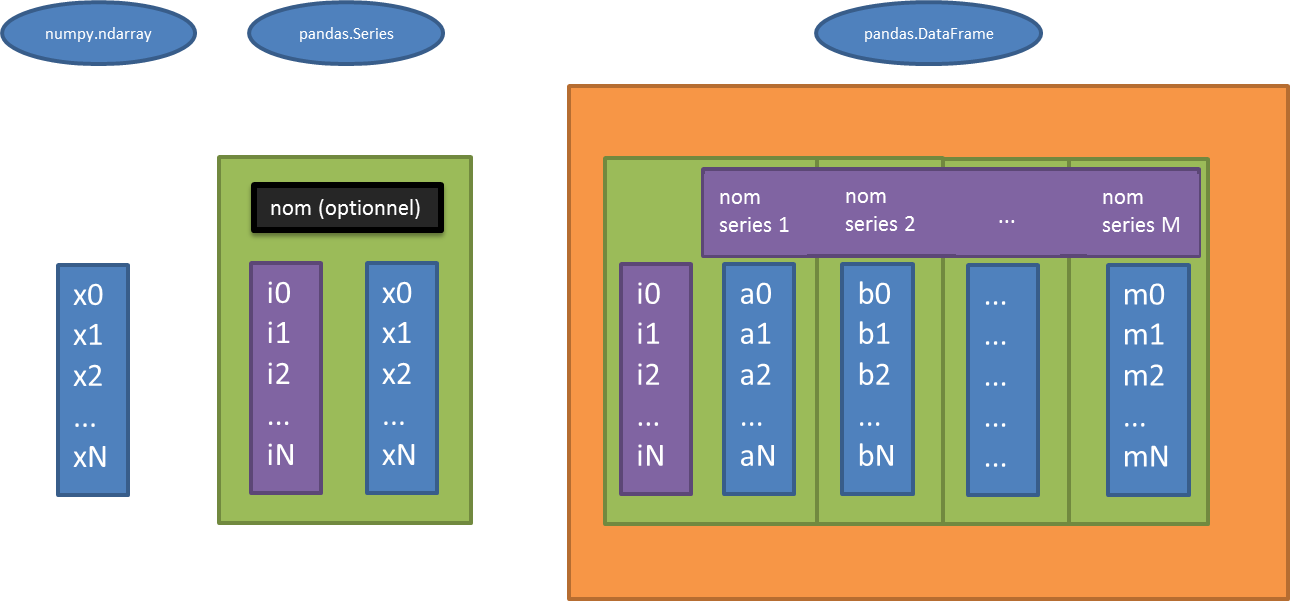

<div class="alert alert-block alert-info"><b>Conseil de lecture :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/10min.html> Tutoriel officiel <b>10 minutes to Pandas</b> </a></div>


# Series

Importons d'abord le module Pandas et Numpy (on en a quasiment toujours besoin)

In [1]:
import pandas as pd
import numpy as np

## Qu'est-ce qu'une Series ?

Une **Series** contient :
- Un **nom** (optionnel)
- Un **index**, qui est une ndarray unidimensionnelle (pouvant être de tous les dtypes évoqués plus loin)
- Une **ndarray unidimensionnelle** d'un dtype fixé à la création de la serie, contenant ses valeurs (**values**)

Elle a une **longueur**, commune à l'index, et aux valeurs

## Création d'une Series

On créé une serie en utilisant le constructeur **pandas.Series()**

##### En utilisant simplement une list ou un tuple

L'index est alors défini automatiquement, c'est l'ensemble des entiers entre 0 et la longueur de cette list (exclus)

In [2]:
pd.Series([1, 3, 5, 4.5, 6,8])

0    1.0
1    3.0
2    5.0
3    4.5
4    6.0
5    8.0
dtype: float64

##### En utilisant un dict 

Une **Series** peut-être assimilée à un **dict** dont :
- les **clés** sont d'un type unique (ils formeront l'**index** de la Series) et 
- les **valeurs** d'un autre type unique (ils formeront les **values** de la Series)

In [5]:
dict_airports = {    
    'ATL': 'Atlanta H.-Jackson',
    'PEK': 'Pékin (métropolitain)',
    'DXB': 'Dubaï',
    'HND': 'Tokyo-Haneda',
    'LAX': 'Los Angeles',
    'ORD': 'Chicago O\'Hare',
    'LHR': 'Londres-Heathrow',
    'HKG': 'Hong Kong',
    'PVG': 'Shanghaï - Pudong',
    'CDG': 'Paris-Charles de Gaulle',
    'AMS': 'Amsterdam-Schiphol',    
}

On peut de plus spécifier le nom de la série en utilisant le paramètre **name**

In [7]:
ser_aero = pd.Series(dict_airports, name='NomAero')
ser_aero

ATL         Atlanta H.-Jackson
PEK      Pékin (métropolitain)
DXB                      Dubaï
HND               Tokyo-Haneda
LAX                Los Angeles
ORD             Chicago O'Hare
LHR           Londres-Heathrow
HKG                  Hong Kong
PVG          Shanghaï - Pudong
CDG    Paris-Charles de Gaulle
AMS         Amsterdam-Schiphol
Name: NomAero, dtype: object

## Indiçage

Une serie peut être indicée de la même manière qu'une **list**:

In [8]:
ser_aero[9]

'Paris-Charles de Gaulle'

**NB** : un indiçage à un élément renvoi la valeur dans le type Python dans laquelle elle est. Ici, une str

Si l'on veut obtenir l'index correspondant, il faut se référer à l'attribut **index** :

In [9]:
ser_aero.index[9]

'CDG'

On peut aussi prendre une tranche (slice) de la serie, le type du résultat est alors une serie

In [10]:
ser_aero[:3]

ATL       Atlanta H.-Jackson
PEK    Pékin (métropolitain)
DXB                    Dubaï
Name: NomAero, dtype: object

---
<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html> Doc officielle Pandas sur les <b>Series</b> </a></div>

# Index

Un **Index** contient :
- Un **nom** (optionnel)
- Un type précis (cf. ci-dessous)

Il existe plusieurs types d'index

##### Index numériques ou de chaines de caractères

- numérique : **pandas.RangeIndex**, **pandas.Int64Index**, **pandas.Float64Index**
- constitué par une chaine de caractères : **pandas.Index**

In [11]:
ser_aero.index

Index(['ATL', 'PEK', 'DXB', 'HND', 'LAX', 'ORD', 'LHR', 'HKG', 'PVG', 'CDG',
       'AMS'],
      dtype='object')

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects> Tutoriel sur les <b>Index</b> </a></div>

##### A plusieurs niveaux : **pandas.MultiIndex**

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/advanced.html> Tutoriel sur les <b>MultiIndex</b> </a></div>

##### Temporels

- par date : **pandas.DatetimeIndex**
- par période : **pandas.PeriodIndex**
- à interval : **pandas.IntervalIndex**,

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html> Doc officielle Pandas sur les <b>DatetimeIndex</b> </a></div>

# DataFrame

Un **DataFrame** est un objet constitué par l'assemblage d'une ou plusieurs **Series** partageant un **Index** commun

## Création manuelle

### A partir d'un dictionnaire de séries

Un **DataFrame** peut-être assimilée à un **dict** dont :
- les **clés** sont d'un type unique (ils formeront les noms de colonnes du DataFrame, **columns**) et 
- les **valeurs** sont des objets Series

On peut créer un DataFrame à partir d'un dict qui à un nom de colonne associe une Series

In [12]:
ser_aero_traf = pd.Series({    
    'ATL': 104,
    'PEK': 96,
    'DXB': 88,
    'HND': 85,
    'LAX': 85,
    'ORD': 80,
    'LHR': 78,
    'HKG': 73,
    'PVG': 70,
    'CDG': 69,
    'FRA': 65,
})

In [14]:
ser_aero_pays = pd.Series({    
    'ATL': 'Etats-Unis',
    'PEK': 'Chine',
    'DXB': 'Emirats Arabes Unis',
    'HND': 'Japon',
    'LAX': 'Etats-Unis',
    'ORD': 'Etats-Unis',
    'LHR': 'Royaume-Uni',
    'HKG': 'Chine',
    'PVG': 'Chine',
    'CDG': 'France',
})

In [15]:
df_aero = pd.DataFrame(
    {'nom': ser_aero, 'trafic': ser_aero_traf, 'pays': ser_aero_pays}
)
df_aero

,nom,trafic,pays
AMS,Amsterdam-Schiphol,NaN,NaN
ATL,Atlanta H.-Jackson,104.0,Etats-Unis
CDG,Paris-Charles de Gaulle,69.0,France
DXB,Dubaï,88.0,Emirats Arabes Unis
FRA,NaN,65.0,NaN
HKG,Hong Kong,73.0,Chine
HND,Tokyo-Haneda,85.0,Japon
LAX,Los Angeles,85.0,Etats-Unis
LHR,Londres-Heathrow,78.0,Royaume-Uni
ORD,Chicago O'Hare,80.0,Etats-Unis


<div class="alert alert-block alert-success"><b>Nota Bene :</b>

- Les Index des différentes Series sont mis en concordance. 
- Si l'info est absente pour certains indices, des valeurs manquantes apparaissent (écrits NaN).
</div>

### A partir d'une liste de tuples

Ou à partir d'une **list de tuples**, mais alors, comme pour la création de Series, l'index est généré automatiquement (entiers à partir de 0). On utilise alors généralement la fonction **zip**.

In [16]:
x = np.linspace(0, 2*np.pi, 50) 

In [17]:
y = np.sin(x)

In [18]:
list(zip(x, y))[:5]

[(0.0, 0.0),
 (0.1282282715750936, 0.127877161684506),
 (0.2564565431501872, 0.25365458390950735),
 (0.38468481472528077, 0.3752670048793741),
 (0.5129130863003744, 0.49071755200393785)]

Les noms de colonne sont alors indexés de 0 à la taille des tuples - 1

Il est alors souhaitable d'utiliser le paramètre **columns** pour spécifier les noms de colonnes

In [19]:
df_trigo = pd.DataFrame(
    list(zip(x, y)), 
    columns=['x', 'sin_x']
)
df_trigo[:5]

,x,sin_x
0,0.000000,0.000000
1,0.128228,0.127877
2,0.256457,0.253655
3,0.384685,0.375267
4,0.512913,0.490718


## Infos essentielles du DataFrame

### Extraction de lignes

In [20]:
df_trigo.head(8) # default : 5

,x,sin_x
0,0.000000,0.000000
1,0.128228,0.127877
2,0.256457,0.253655
3,0.384685,0.375267
4,0.512913,0.490718
5,0.641141,0.598111
6,0.769370,0.695683
7,0.897598,0.781831


In [21]:
df_trigo.tail() # default : 5

,x,sin_x
45,5.770272,-4.907176e-01
46,5.898500,-3.752670e-01
47,6.026729,-2.536546e-01
48,6.154957,-1.278772e-01
49,6.283185,-2.449294e-16


In [22]:
df_trigo.sample(5) # default : 1

,x,sin_x
22,2.821022,0.315108
13,1.666968,0.995379
7,0.897598,0.781831
19,2.436337,0.648228
41,5.257359,-0.855143


<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/api.html#reindexing-selection-label-manipulation> Doc officielle Pandas sur les <b>fonctions d'extraction</b></a></div>

### Infos essentielles

In [23]:
df_aero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, AMS to PVG
Data columns (total 3 columns):
nom       11 non-null object
trafic    11 non-null float64
pays      10 non-null object
dtypes: float64(1), object(2)
memory usage: 384.0+ bytes


## Attributs du DataFrame

##### Forme du DataFrame

A l'image des ndarrays, on peut obtenir la shape d'un DataFrame :

In [24]:
df_aero.shape

(12, 3)

##### dtypes des Series du DataFrame

In [25]:
df_aero.dtypes

nom        object
trafic    float64
pays       object
dtype: object

**NB** : Il s'agit d'une **Series**

##### Index du DataFrame

In [26]:
df_aero.index

Index(['AMS', 'ATL', 'CDG', 'DXB', 'FRA', 'HKG', 'HND', 'LAX', 'LHR', 'ORD',
       'PEK', 'PVG'],
      dtype='object')

**NB** : il s'agit d'un objet **Index**

##### Noms de colonne

In [27]:
df_aero.columns

Index(['nom', 'trafic', 'pays'], dtype='object')

**NB** : il s'agit aussi d'un objet **Index**

##### Valeurs du DataFrame

In [28]:
df_aero.values

array([['Amsterdam-Schiphol', nan, nan],
       ['Atlanta H.-Jackson', 104.0, 'Etats-Unis'],
       ['Paris-Charles de Gaulle', 69.0, 'France'],
       ['Dubaï', 88.0, 'Emirats Arabes Unis'],
       [nan, 65.0, nan],
       ['Hong Kong', 73.0, 'Chine'],
       ['Tokyo-Haneda', 85.0, 'Japon'],
       ['Los Angeles', 85.0, 'Etats-Unis'],
       ['Londres-Heathrow', 78.0, 'Royaume-Uni'],
       ["Chicago O'Hare", 80.0, 'Etats-Unis'],
       ['Pékin (métropolitain)', 96.0, 'Chine'],
       ['Shanghaï - Pudong', 70.0, 'Chine']], dtype=object)

**NB** : Il s'agit d'une **ndarray**

##### Transposée du DataFrame

In [29]:
df_aero.T

,AMS,ATL,CDG,DXB,FRA,HKG,HND,LAX,LHR,ORD,PEK,PVG
nom,Amsterdam-Schiphol,Atlanta H.-Jackson,Paris-Charles de Gaulle,Dubaï,NaN,Hong Kong,Tokyo-Haneda,Los Angeles,Londres-Heathrow,Chicago O'Hare,Pékin (métropolitain),Shanghaï - Pudong
trafic,NaN,104,69,88,65,73,85,85,78,80,96,70
pays,NaN,Etats-Unis,France,Emirats Arabes Unis,NaN,Chine,Japon,Etats-Unis,Royaume-Uni,Etats-Unis,Chine,Chine


**NB** : C'est aussi un **DataFrame**

##### Notation objet

On peut aussi faire référence à une Series en utilisant son nom directement comme si c'était un objet de notre DataFrame

In [30]:
df_aero.nom

AMS         Amsterdam-Schiphol
ATL         Atlanta H.-Jackson
CDG    Paris-Charles de Gaulle
DXB                      Dubaï
FRA                        NaN
HKG                  Hong Kong
HND               Tokyo-Haneda
LAX                Los Angeles
LHR           Londres-Heathrow
ORD             Chicago O'Hare
PEK      Pékin (métropolitain)
PVG          Shanghaï - Pudong
Name: nom, dtype: object

<div class="alert alert-block alert-success"><b>Attention :</b>

Cela ne marche pas avec tous les noms de Series. Ca ne marche pas :
- s'il y a des espaces dans le nom de la Series
- si le nom de la Series est déjà un nom de méthode ou d'attribut (par exemple une série qui s'appelerai sum ou shape)
- pour la création de nouvelles séries

Il est alors impossible de s'y référer en utilisant cette notation.

**Bref, par souci de clarté et homogénéité, il est préférable de ne pas utiliser cette notation objet**
</div>

## Indiçage

Dans un **DataFrame**, l'indiçage se fait dans l'ordre **(ligne, colonne)**, comme pour les ndarrays à 2 dimensions.

D'ailleurs dans beaucoup de méthodes, on désigne l'axe des **lignes** par **axis=0**, l'axe des **colonnes** par **axis=1**

### Series

##### indiçage par nom

Par indiçage direct, on fait référence à l'utilisation de l'opérateur d'indiçage directement sur le DataFrame, par exemple ***df_trigo[...]***

Si on utilise directement l'opérateur d'indiçage, Pandas renverra la **Series** portant le nom (ou le numéro) passé à l'opérateur d'indiçage

```python
mon_dataframe[nom_colonne]

```

Le résultat est de type **Series**

Si le nom ne correspond à aucune Series présente dans le DataFrame, ça provoque une erreur.

In [31]:
df_aero['nom']

AMS         Amsterdam-Schiphol
ATL         Atlanta H.-Jackson
CDG    Paris-Charles de Gaulle
DXB                      Dubaï
FRA                        NaN
HKG                  Hong Kong
HND               Tokyo-Haneda
LAX                Los Angeles
LHR           Londres-Heathrow
ORD             Chicago O'Hare
PEK      Pékin (métropolitain)
PVG          Shanghaï - Pudong
Name: nom, dtype: object

NB : Le résultat est alors de type **Series**

##### fancy indexing

Pour obtenir un **sous-ensemble** de séries d'un **DataFrame** (qui est lui aussi un **DataFrame**), on passe une liste de valeurs :

In [32]:
df_aero[['nom', 'pays']].head()

,nom,pays
AMS,Amsterdam-Schiphol,NaN
ATL,Atlanta H.-Jackson,Etats-Unis
CDG,Paris-Charles de Gaulle,France
DXB,Dubaï,Emirats Arabes Unis
FRA,NaN,NaN


NB : Le résultat est alors de type **DataFrame**

##### Création et modification de séries

Numpy a été conçu de manière à facilement générer des séries à partir d'opérations mathématiques sur d'autres séries

In [33]:
df_trigo['cos_x'] = np.cos(df_trigo['x'])
df_trigo[:5]

,x,sin_x,cos_x
0,0.000000,0.000000,1.000000
1,0.128228,0.127877,0.991790
2,0.256457,0.253655,0.967295
3,0.384685,0.375267,0.926917
4,0.512913,0.490718,0.871319


Si la séries existe déjà, elle est redéfinie intégralement

### Indiçage par indice : DataFrame.iloc

**iloc** fonctionne sur la base des **indices** et se comport simplement comme un **ndarray** à deux dimensions.

##### Elément

In [34]:
df_aero.iloc[3, 1] # 4e ligne, 2e colonne

88.0

##### Ligne ou colonne

In [35]:
df_aero.iloc[1] # 2e ligne

nom       Atlanta H.-Jackson
trafic                   104
pays              Etats-Unis
Name: ATL, dtype: object

NB : Le résultat est alors de type **Series**

In [36]:
df_aero.iloc[:, 1] # 2e colonne

AMS      NaN
ATL    104.0
CDG     69.0
DXB     88.0
FRA     65.0
HKG     73.0
HND     85.0
LAX     85.0
LHR     78.0
ORD     80.0
PEK     96.0
PVG     70.0
Name: trafic, dtype: float64

NB : Le résultat est alors de type **Series**

##### Slicing

In [37]:
df_aero.iloc[1:3] # 2e à 4e ligne (excluse)

,nom,trafic,pays
ATL,Atlanta H.-Jackson,104.0,Etats-Unis
CDG,Paris-Charles de Gaulle,69.0,France


NB : Le résultat est alors de type **DataFrame**

In [38]:
df_aero.iloc[1:4, 0:2] # 2e à 4e ligne (excluse), 4e à 6e colonne (excluse)

,nom,trafic
ATL,Atlanta H.-Jackson,104.0
CDG,Paris-Charles de Gaulle,69.0
DXB,Dubaï,88.0


NB : Le résultat est alors de type **DataFrame**

##### Fancy indexing

In [39]:
df_aero.iloc[:, [0, 2]] # 2e à 4e ligne (excluse), 4e à 6e colonne (excluse)

,nom,pays
AMS,Amsterdam-Schiphol,NaN
ATL,Atlanta H.-Jackson,Etats-Unis
CDG,Paris-Charles de Gaulle,France
DXB,Dubaï,Emirats Arabes Unis
FRA,NaN,NaN
HKG,Hong Kong,Chine
HND,Tokyo-Haneda,Japon
LAX,Los Angeles,Etats-Unis
LHR,Londres-Heathrow,Royaume-Uni
ORD,Chicago O'Hare,Etats-Unis


### Indiçage par identifiant : DataFrame.loc

**loc** fonctionne sur la base d'identifiants (de lignes et/ou de colonnes). Pour obtenir un élément précis, on fait:

In [40]:
df_trigo.loc[1, 'cos_x'] # ligne d'index nommé 1 , colonne nommée cos_x

0.9917900138232462

La formulation précédente ne fonctionne que parce que l'index est un index numérique entier.

**Cela ne signifie pas la ligne d'index 1 (qui serait en deuxième position donc)**

In [41]:
df_aero.loc['CDG', 'nom'] # ligne d'index nommé CDG, colonne nom

'Paris-Charles de Gaulle'

In [42]:
df_trigo.loc[1] # ligne d'index nommé 1

x        0.128228
sin_x    0.127877
cos_x    0.991790
Name: 1, dtype: float64

##### Slicing

In [43]:
df_trigo.loc[1:3] # lignes allant de l'index nommé 1 à l'index nommé 3 (inclus)

,x,sin_x,cos_x
1,0.128228,0.127877,0.991790
2,0.256457,0.253655,0.967295
3,0.384685,0.375267,0.926917


In [44]:
df_trigo.loc[1:4, 'x':'sin_x']

,x,sin_x
1,0.128228,0.127877
2,0.256457,0.253655
3,0.384685,0.375267
4,0.512913,0.490718


<div class="alert alert-block alert-success"><b>Attention :</b>

Contrairement au comportement normal de Python (qui s'applique y compris à iloc), **pandas.DataFrame.loc inclut la borne supérieure lors de la définition d'une étendue !!**
</div>

##### Fancy indexing

In [45]:
df_trigo.loc[1:4, ['x', 'cos_x']]

,x,cos_x
1,0.128228,0.991790
2,0.256457,0.967295
3,0.384685,0.926917
4,0.512913,0.871319


---
<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/indexing.html> Tutoriel sur <b>l'indiçage</b> </a></div>

## Méthodes de DataFrame

Il existe un grand nombre de méthodes rattachées à l'objet DataFrame, nous n'en présenterons ici que quelques unes et nous continuerons à explorer le sujet dans les prochains cours.

### Muabilité

Le DataFrame est un objet curieux en termes de **muabilité**:
- C'est un type **muable** (attention donc au travail sur les **alias**, bien faire une copie avec **pandas.DataFrame.copy()** lorsque c'est nécessaire)
- Ses méthodes sont réglées pour fonctionner par défaut comme des méthodes de type **immuable**, à l'image des **str**, par exemple la méthode **pandas.DataFrame.sort_values()** :
    - **renvoie une copie modifiée du DataFrame** mais
    - **ne modifie pas le DataFrame d'origine**

Pour toutes ces méthodes, si l'on ajoute le paramètre **inplace=True** à l'appel de la méthode, le DataFrame d'origine se modifie

A l'usage, il s'avère que cette manière bizarre de gérer la muabilité est très pratique, en particulier lorsqu'il s'agit d'enchainer des instructions

Un warning **SettingWithCopyWarning** rappelle parfois à l'utilisateur qu'il est en train de travailler sur une copie renvoyée par une méthode du DataFrame, et non sur un DataFrame, il ne faut absolument pas faire ça

### Application : la méthode sort_values()

In [46]:
df_aero.sort_values('trafic').head()

,nom,trafic,pays
FRA,NaN,65.0,NaN
CDG,Paris-Charles de Gaulle,69.0,France
PVG,Shanghaï - Pudong,70.0,Chine
HKG,Hong Kong,73.0,Chine
LHR,Londres-Heathrow,78.0,Royaume-Uni


Cette méthode tri les éléments du plus petit au plus gros, sauf si on lui demande spécifiquement de faire l'inverse

In [47]:
df_aero.sort_values('trafic', ascending=False).head()

,nom,trafic,pays
ATL,Atlanta H.-Jackson,104.0,Etats-Unis
PEK,Pékin (métropolitain),96.0,Chine
DXB,Dubaï,88.0,Emirats Arabes Unis
HND,Tokyo-Haneda,85.0,Japon
LAX,Los Angeles,85.0,Etats-Unis


On peut aussi réorganiser sur la base de plusieurs colonnes

In [48]:
df_aero.sort_values(['pays', 'trafic'])

,nom,trafic,pays
PVG,Shanghaï - Pudong,70.0,Chine
HKG,Hong Kong,73.0,Chine
PEK,Pékin (métropolitain),96.0,Chine
DXB,Dubaï,88.0,Emirats Arabes Unis
ORD,Chicago O'Hare,80.0,Etats-Unis
LAX,Los Angeles,85.0,Etats-Unis
ATL,Atlanta H.-Jackson,104.0,Etats-Unis
CDG,Paris-Charles de Gaulle,69.0,France
HND,Tokyo-Haneda,85.0,Japon
LHR,Londres-Heathrow,78.0,Royaume-Uni


Pour modifier le DataFrame il faut :

In [49]:
df_aero = df_aero.sort_values(['pays', 'trafic'])

# OU

df_aero.sort_values(['pays', 'trafic'], inplace=True)

Du coup, ces instructions ne renvoient rien...

In [50]:
df_aero

,nom,trafic,pays
PVG,Shanghaï - Pudong,70.0,Chine
HKG,Hong Kong,73.0,Chine
PEK,Pékin (métropolitain),96.0,Chine
DXB,Dubaï,88.0,Emirats Arabes Unis
ORD,Chicago O'Hare,80.0,Etats-Unis
LAX,Los Angeles,85.0,Etats-Unis
ATL,Atlanta H.-Jackson,104.0,Etats-Unis
CDG,Paris-Charles de Gaulle,69.0,France
HND,Tokyo-Haneda,85.0,Japon
LHR,Londres-Heathrow,78.0,Royaume-Uni


<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html> Doc officielle Pandas sur la méthode <b>sort_values</b> </a></div>

Nous étudierons de manière plus extensive les méthodes de DataFrame dans les sections suivantes

---
<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html> Doc officielle Pandas sur les <b>DataFrame</b></a></div>

# Lecture/Ecriture de fichiers

## Lecture de fichiers

Pour charger un fichier avec pandas, on utilise les fonctions **pandas.read_\*** :
- pandas.read_excel
- pandas.read_csv
- pandas.read_sql
- pandas.read_sas
- etc.

##### Lecture de fichier Excel

Pour lire un excel on utilise pandas.read_excel

In [ ]:
df_bikeshare = pd.read_excel('../data/bike_share.xlsx')

In [ ]:
df_bikeshare.head()

Plusieurs paramètres existent pour cette fonction, par exemple sheet_name=*nom d'onglet*.

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html> Doc officielle Pandas sur la méthode <b>read_excel()</b> </a></div>

##### Lecture de fichier CSV

Pour ouvrir le format le plus simple, la famille des formats CSV/TSV, on utilise **pandas.read_csv()**

NB : Les codeurs qui ont fait **pandas** ont raisonné comme moi, et ils ont créé les fonctions **read_\*** en considérant **utf-8** comme le codage principal. Contrairement à open, les fonctions read ouvrent les fichiers en utf-8 par défaut, on peut donc essayer sans risque d'ouvrir sans préciser l'encodage. S'il y a une erreur d'encodage, pas de panique, on spécifie un encodage (**ansi** a priori).

In [ ]:
df_gflight = pd.read_csv('../data/Googleflights.csv', sep=';', decimal=',')

Plusieurs paramètres sont importants dans le cas du csv pour palier la simplicité de ce format. Il faut préciser :
- si le séparateur de colonnes utilisé n'est pas **, (virgule)** et si les chiffres à virgule ne sont pas représentés avec un point décimal (1.23), ce qui est typiquement le cas avec les csv français. Il faut alors ajouter ces options en conséquence : 
    - **sep=';'**
    - **decimal=','**
- s'il n'y a pas de ligne d'en-tête il faut ajouter le paramètre : **names=liste_des_noms_de_séries**
- si on veut qu'il utilise une ou plusieurs colonnes comme index, il faut lui passer le paramètre **index_col=(index_de_colonne ou liste_d'indices_de_colonnes)**

In [ ]:
df_gflight.head()

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html> Doc officielle Pandas sur la méthode <b>read_csv()</b> </a></div>

## Ecriture de fichiers

Comme pour la lecture de fichier, l'écriture de fichier se fait simplement en utilisant les fonction **pandas.DataFrame.to_\*()**

##### En CSV

On peut par exemple stocker sous forme de csv à nouveau :

In [ ]:
df_gflight.to_csv('../output/Nouveau_Output_GFLT_2.csv', sep=';', decimal=',')

##### En Excel

In [ ]:
df_gflight.to_excel('../output/nouveau_GFLT.xlsx')

##### En HDF5

La solution est alors de changer de format, par exemple en utilisant HDF5

In [ ]:
df_gflight.to_hdf('../output/database.h5', key='Output_GFLT', format="table")

##### En SQL

Pour utiliser les fonctionnalités du SQL il faut d'abord importer le module **sqlite3**

In [ ]:
import sqlite3 as sql

In [ ]:
with sql.connect('../output/database.db') as connec:
    df_gflight.to_sql('Output_GFLT', connec, if_exists='replace')

<div class="alert alert-block alert-info"><b>Pour aller plus loin :</b> <a href=https://pandas.pydata.org/pandas-docs/stable/api.html#input-output> Liste de méthode de <b>gestion des entrées/sorties</b> </a></div>